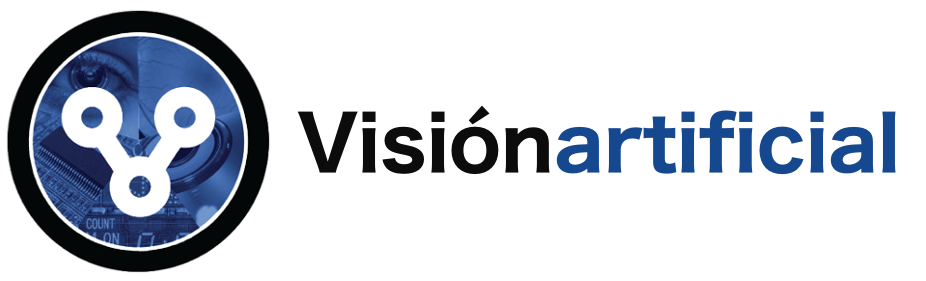

# OpenCV 

### para a materia de Visión Artificial do Grao de Robótica. EPSE de Lugo.

<hr style = "border: none; height: 4px; background-color: # D3D3D3" />

# <font style="color:rgb(50,120,229)">Detector de puntos GFTT</font>

O detector de puntos Shi-Tomasi coñécese máis comúnmente como o detector Good Features to Track ou simplemente GFTT. Este detector de puntos foi introducido por Shi e Tomasi no seu artigo de 1994, [Good Features to Track](./artigos/shi_1994.pdf). GFTT é, en realidade, só unha modificación moi sinxela do detector de puntos clave Harris, que xa vimos no seu correspondente caderno jupyter.

## <font style="color:rgb(50,120,229)">Obxectivo:</font>

Neste caderno, repasaremos unha extensión moi sinxela do detector de puntos de Harris chamado detector "Good Features to Track", ou simplemente GFTT. Esta sinxela extensión mellora a capacidade do detector para atopar rexións parecidas a esquinas nas imaxes. 


## <font style="color:rgb(50,120,229)">Como funciona o detector de puntos clave de Harris?</font>

Se lembras, no caderno adicado ao detector de Harris achábase un valor $R$ que se empregaba como criterio para indicar se unha rexión da imaxe era unha esquina ou non. O valor $R$ era:

$$R = det(M) - k(trace(M))^{2}$$

que pode ser descomposto como:

$$R = \lambda_{1}\lambda_{2} - k(\lambda_{1} + \lambda_{2})^{2}$$

**Nota:** consulta o caderno correspondente para unha explicación máis detallada destas ecuacións.

Non obstante, Shi e Tomasi notaron que había unha  función mellor que se podía usar. Propuxeron para $R$ a seguinte formulación:

$$R = min(\lambda_{1}, \lambda_{2})$$

Neste caso, simplemente tomamos o valor mínimo das compoñentes dos autovalores propios. Se este valor $R$ é maior que un limiar $T$ (é dicir, $R >= T$), entón podemos marcar a rexión como unha esquina.

Imos visualizar o detector Shi-Tomasi examinando a seguinte figura:

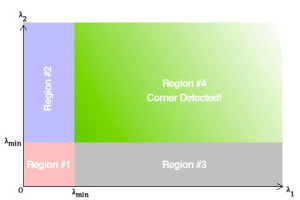

- Na Rexión #1, tanto $\lambda_{1}$ como $\lambda_{2}$ son $<T$; logo a rexión non é un punto clave.
- Na Rexión #2, $\lambda_{1}$ é $< T$, polo que, de novo, non podemos marcar a rexión como un punto clave.
- De xeito similar, na Rexión #3, $\lambda_{2}$ é $< T$, polo que a rexión non se pode marcar como un punto clave.
- Finalmente, cando $\lambda_{1} > T$ e $\lambda_{2} > T$, podemos marcar a rexión como un punto clave de esquina na Rexión #4.

Este pequeno cambio no detector de Harris leva a detectar esquinas máis estables. Tamén é un pouco máis rápido ao reducir unha multiplicación e unha suma dos valores propios.

Entón, que detector deberías usar: Harris ou o detector Shi-Tomasi/GFTT?

Para a maioría das aplicacións,(probablemente) non notaras unha diferenza substancial entre os dous. Polo que debes decidir segundo o teu criterior e aplicación que esteas desenvolvendo.

Para que se usa o detector Shi-Tomasi/GFTT?

O detector de Shi-Tomasi/Good Features to Track úsase para detectar esquinas nas imaxes. É case idéntico ao detector de Harris con só un pequeno cambio na función de cálculo de "esquinicidade".

Vexamos un exemplo:

In [1]:
# importamos paquetes necesarios
from __future__ import print_function
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
matplotlib.rcParams['image.cmap'] = 'gray'

In [3]:
def gftt(gray, maxCorners=0, qualityLevel=0.01, minDistance=1,
	mask=None, blockSize=3, useHarrisDetector=False, k=0.04):
	# computamos os putnos GFTT segundo parametros aportados (OpenCV 3)
	kps = cv2.goodFeaturesToTrack(gray, maxCorners, qualityLevel,
		minDistance, mask=mask, blockSize=blockSize,
		useHarrisDetector=useHarrisDetector, k=k)

	# creamos e dovolvemos o obxecto `KeyPoint`
	return [cv2.KeyPoint(pt[0][0], pt[0][1], 3) for pt in kps]

# de keypoints: 746


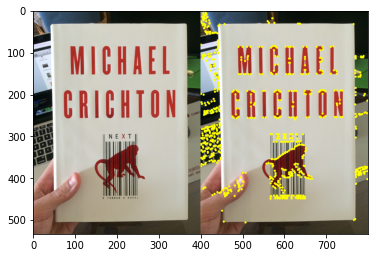

In [5]:
# cargamos a imaxe e pasamola a gris
image = cv2.imread("../data/next.png")
if image is None:
	print("Imaxe non atopada")
orig = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# puntos clave GFTT empregando OpenCV 3+
kps = gftt(gray)

# lazo sobre os puntos clave e visualizamolos
for kp in kps:
	r = int(0.5 * kp.size)
	(x, y) = np.int0(kp.pt)
	cv2.circle(image, (x, y), r, (0, 255, 255), 2)

print("# de keypoints: {}".format(len(kps)))
    
# Visualiamos a imaxe
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
orig = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)
plt.imshow(image);
plt.imshow(np.hstack([orig, image]));